In [5]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, read_file
from pandas import notnull
%matplotlib inline

input_file = os.path.join(os.path.abspath('..'), 'data', 'idaho-lakes', 'majlakes.shp')
if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Please download the tutorial data or fix the path!')

Input file: /Users/kjordahl/scipy2015/geospatial_tutorial/data/idaho-lakes/majlakes.shp


## Part 1

Load the input file into a `GeoDataFrame`.

How many lakes are there?

What is the coordinate system (map projection)?

Make a plot.

set(['There are 186 lakes.'])
{u'lon_0': -114, u'k': 0.9996, u'datum': u'NAD83', u'y_0': 1200000, u'no_defs': True, u'proj': u'tmerc', u'x_0': 2500000, u'units': u'm', u'lat_0': 42}


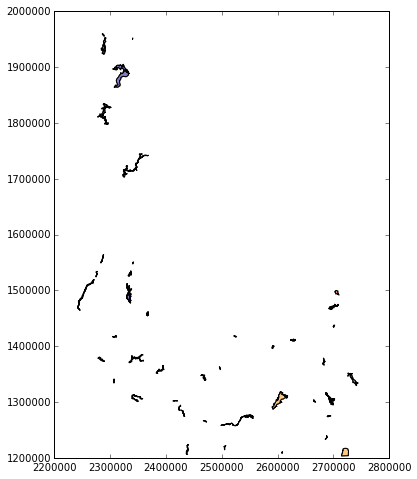

In [3]:
df = read_file(input_file)
print({'There are {} lakes.'.format(len(df))})
print(df.crs)
fig = plt.figure(figsize=(8, 8))
df.plot()

## Part 2

Plot only the lakes that have the `NAME` column set.

There are 51 lakes with names.


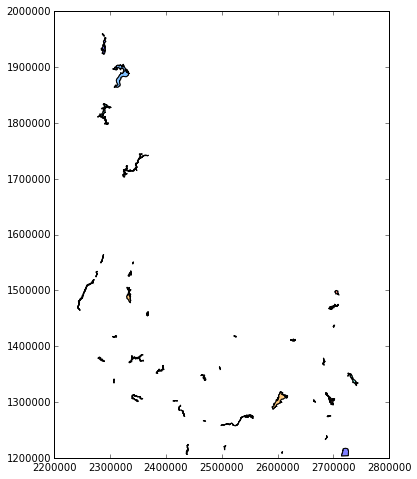

In [6]:
flag = notnull(df['NAME'])
print('There are {} lakes with names.'.format(sum(flag)))
fig = plt.figure(figsize=(8, 8))
df.ix[flag].plot()

## Part 3

Calculate the area of all the lakes (use the `geometry` column as a `GeoSeries`).

What are the units of area?

Compare your calculated areas with those in the `AREA` column. Relative difference would be more useful here.

0     5.425334e+06
1     9.445355e+07
2     9.841964e+04
3     5.234881e+03
4     4.178181e+05
5     1.067599e+06
6     3.601018e+03
7     8.996802e+05
8     3.152292e+04
9     3.399412e+08
10    8.511127e+03
11    1.417366e+04
12    2.445796e+04
13    5.885972e+03
14    5.510090e+05
...
171    8.251626e+03
172    6.471313e+04
173    5.800579e+05
174    1.703487e+06
175    1.071962e+07
176    4.070742e+06
177    1.382742e+08
178    5.017876e+05
179    6.016576e+07
180    1.419393e+06
181    9.985791e+03
182    8.362424e+03
183    1.757408e+07
184    6.774477e+03
185    1.235345e+04
Length: 186, dtype: float64


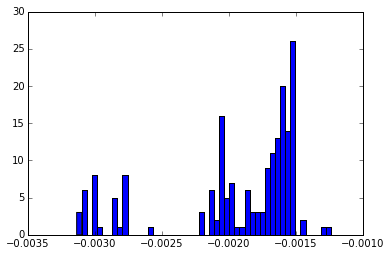

In [10]:
# area in square meters (CRS units are meters)
print(df.geometry.area)
percent_diff = 100.0 * (df.geometry.area - df['AREA']) / df['AREA']
h = plt.hist(percent_diff, bins=50)

## BONUS

Plot the bounding box of the data in the Landsat exercise on the same plot as the lakes.